### Notebook para analizar los resultados obtenidos de la simulación de Ising

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [68]:
global T_range
T_step = 0.1
T_range = np.arange(4.0, 0, -T_step)

## Magnetización a lo largo de la evolución

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8588\2579175182.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


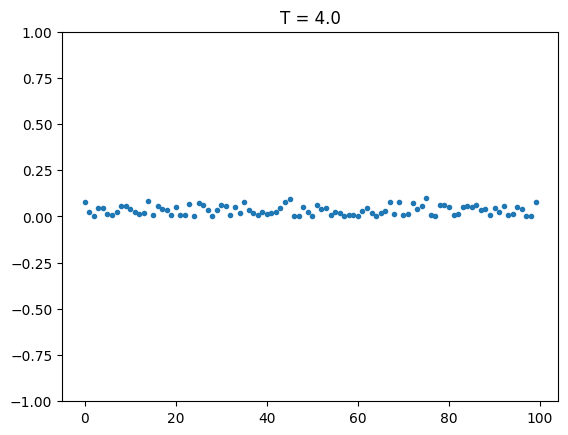

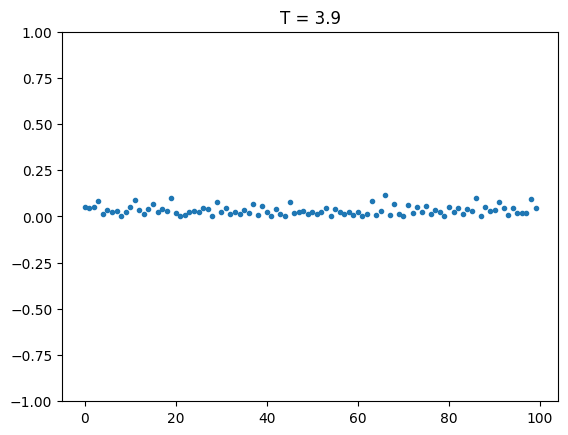

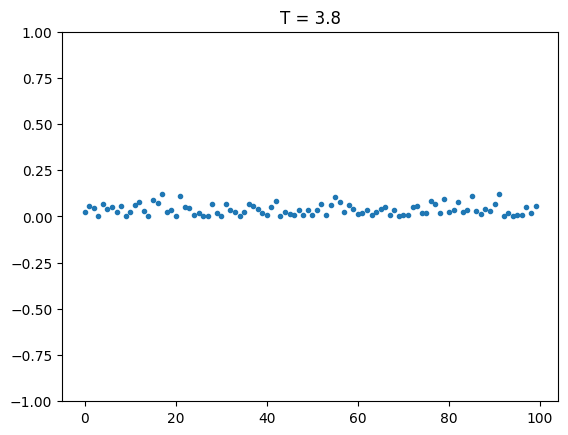

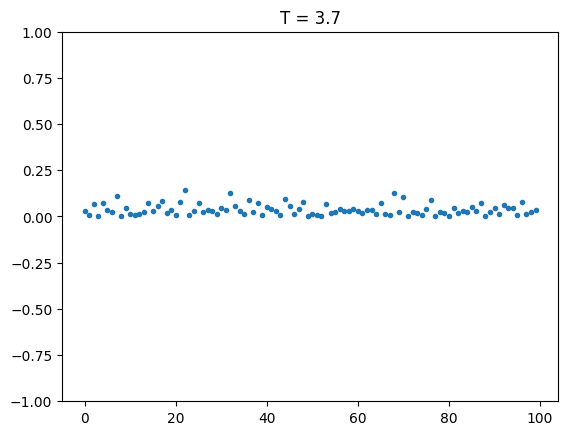

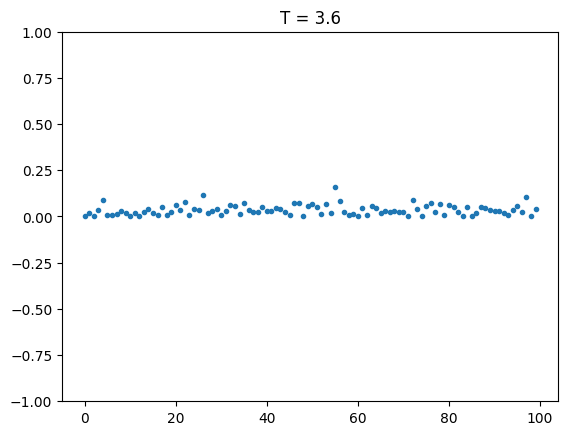

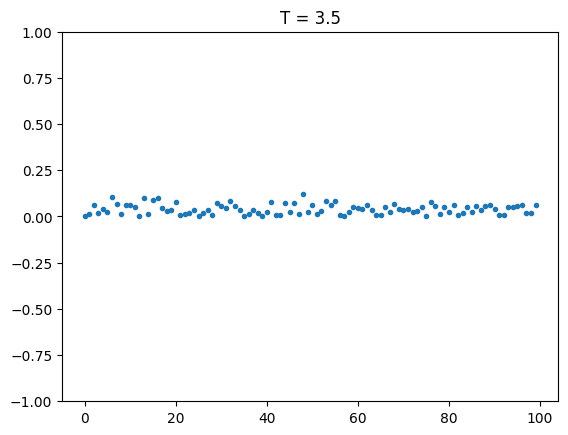

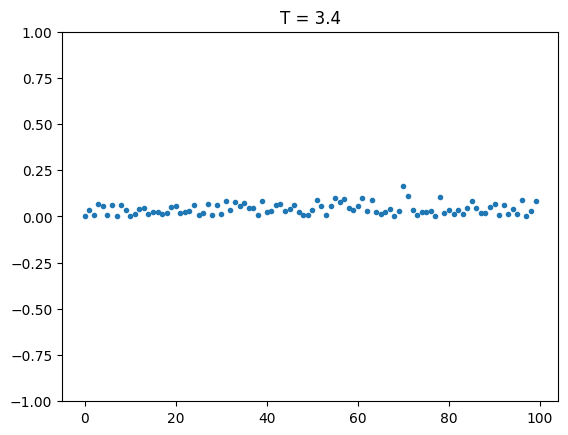

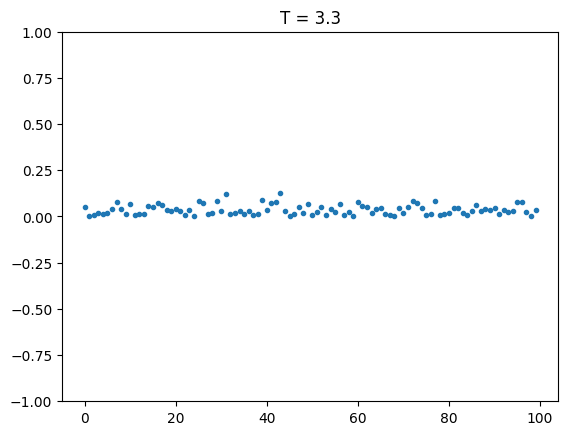

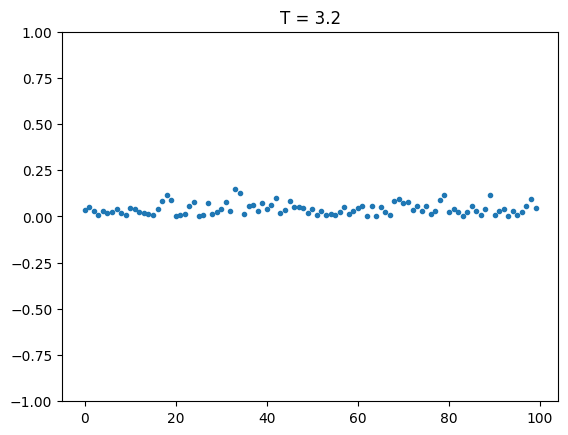

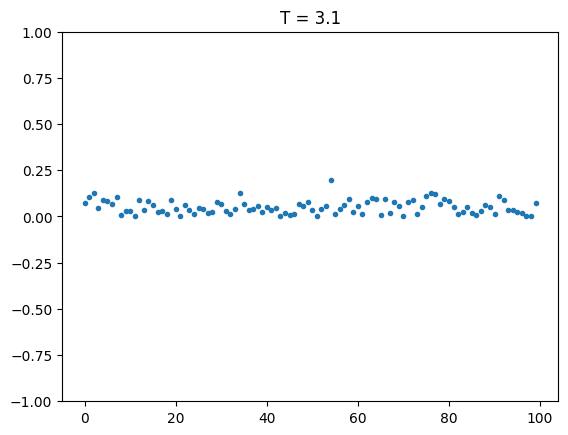

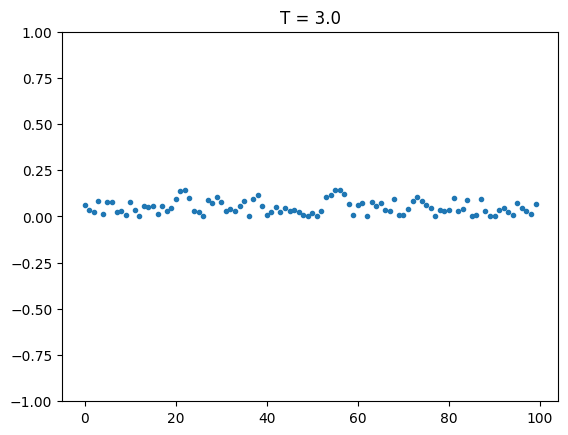

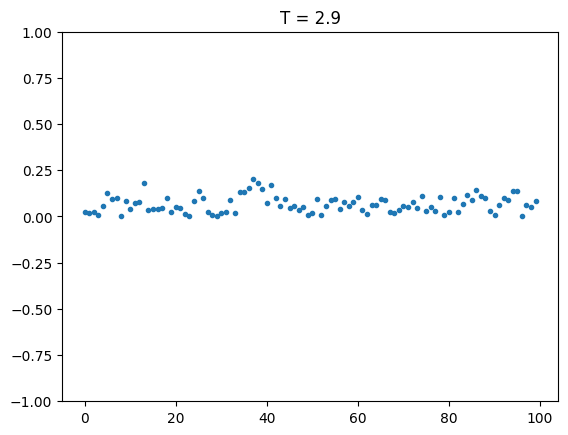

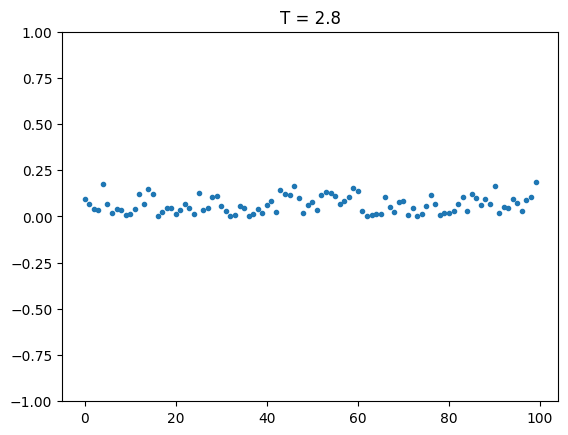

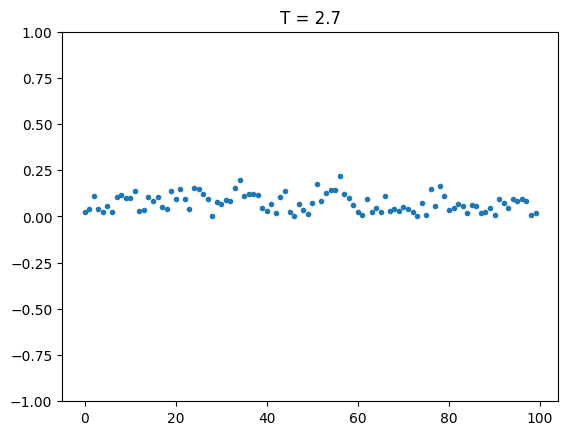

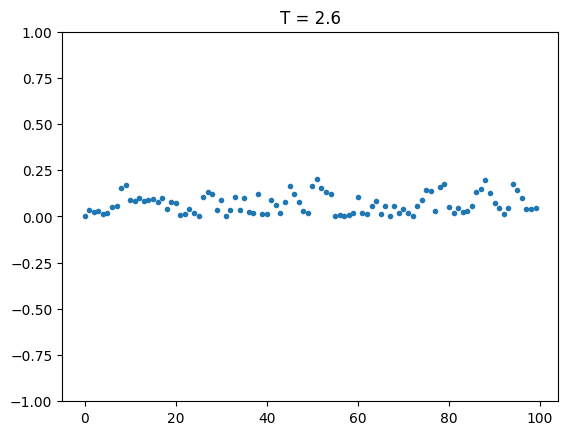

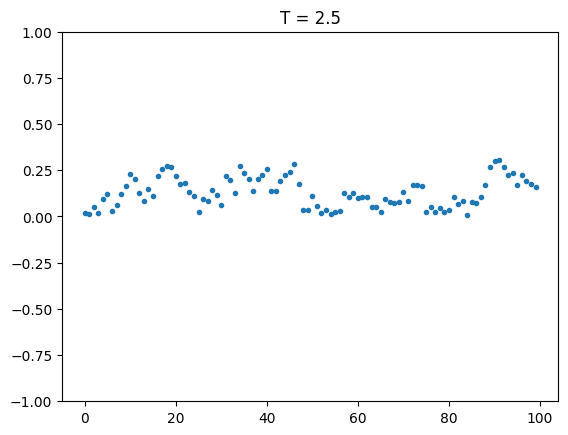

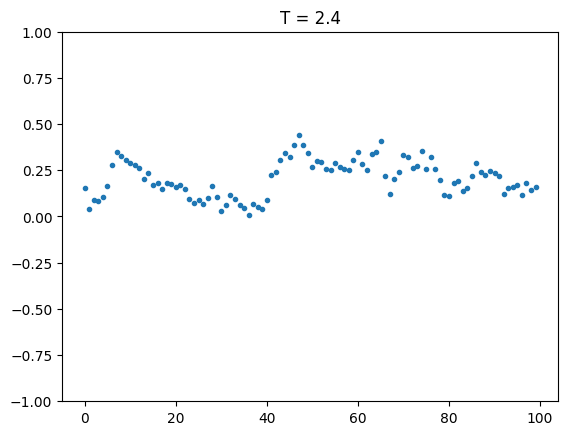

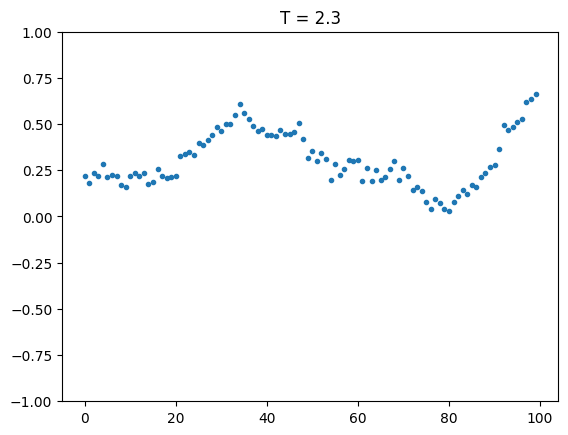

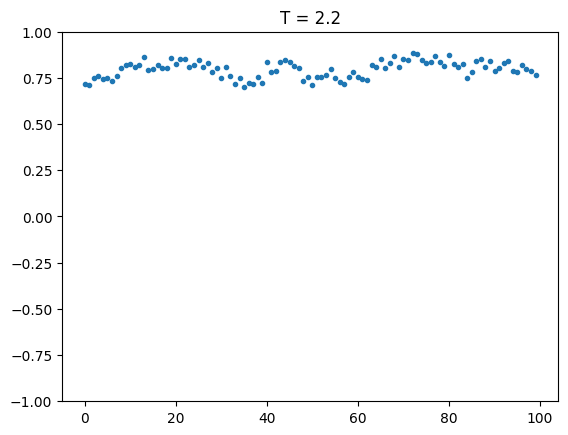

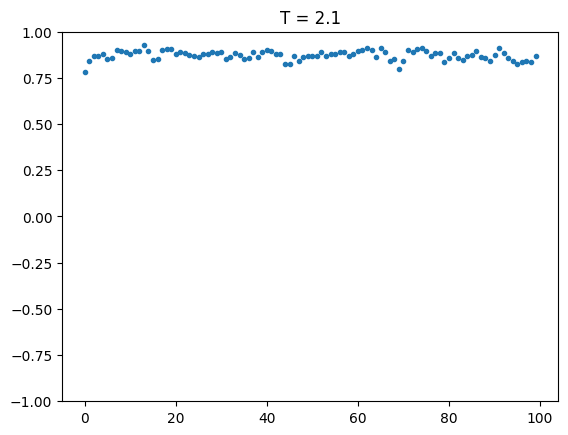

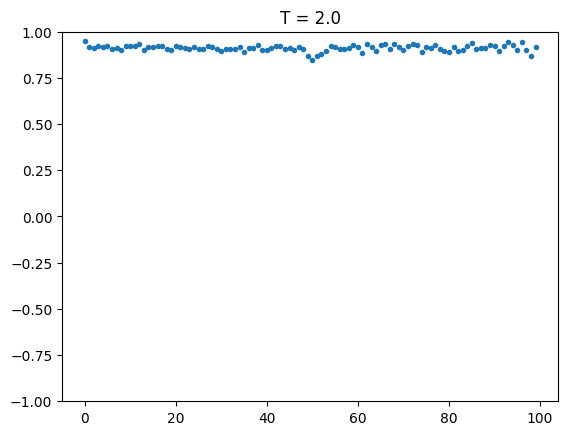

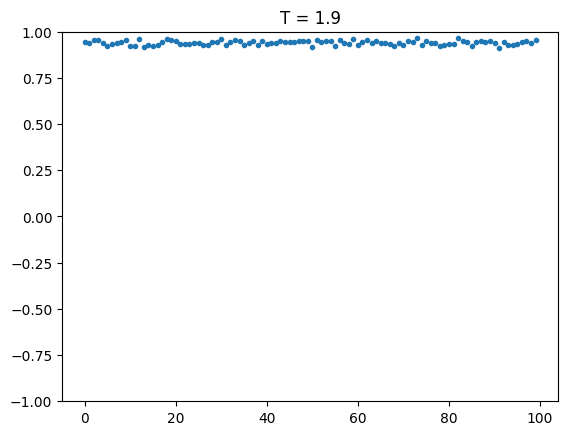

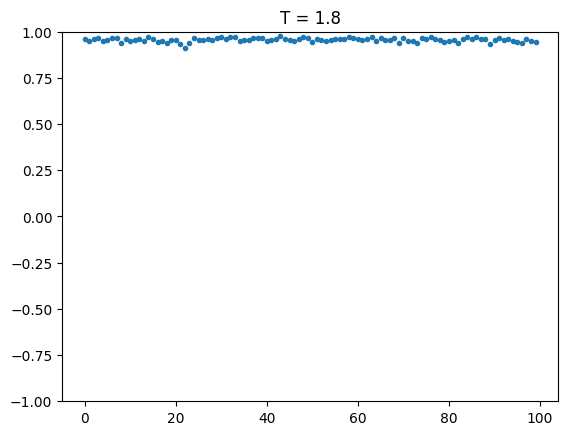

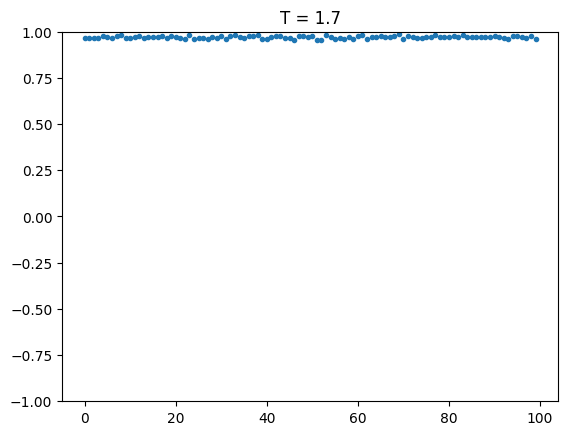

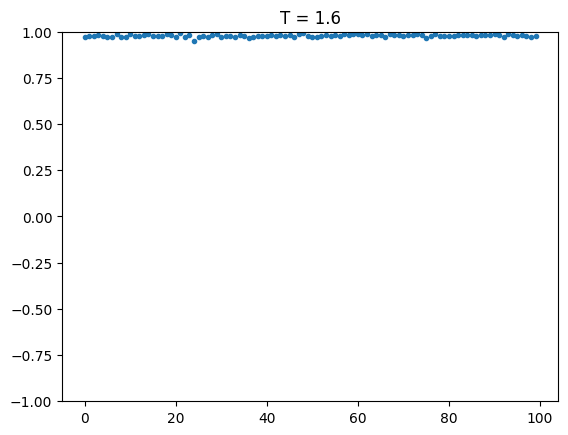

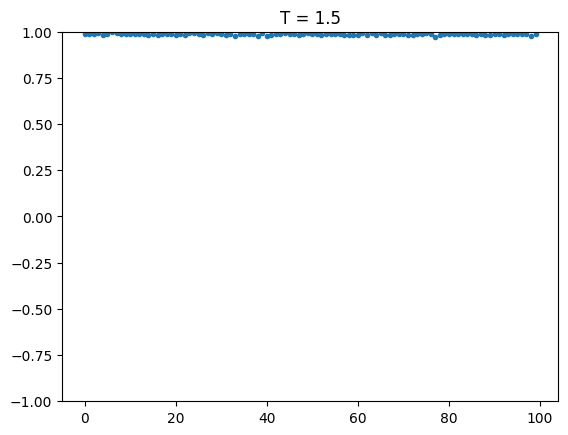

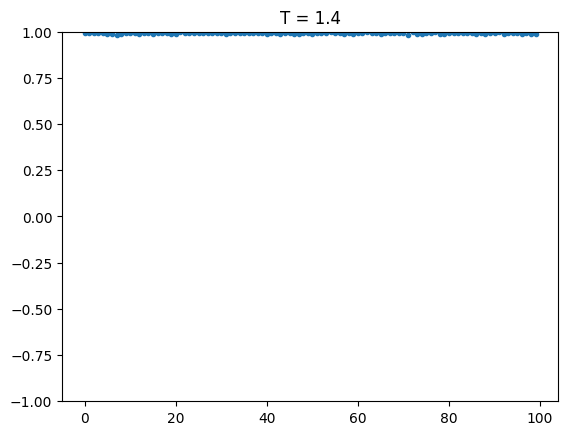

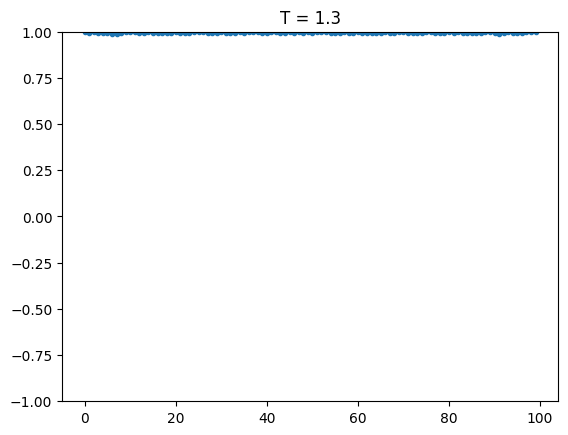

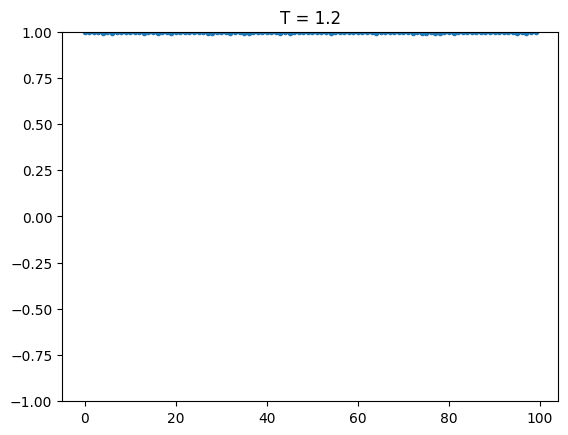

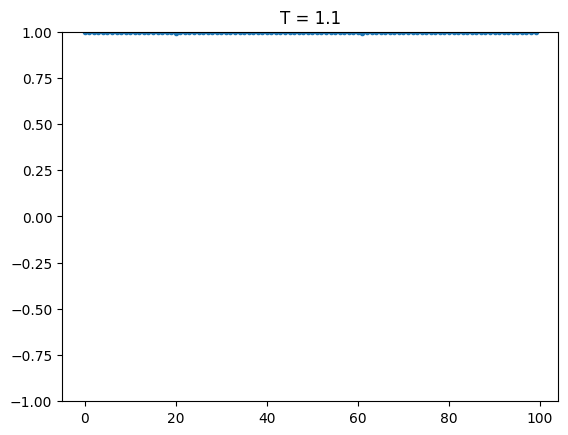

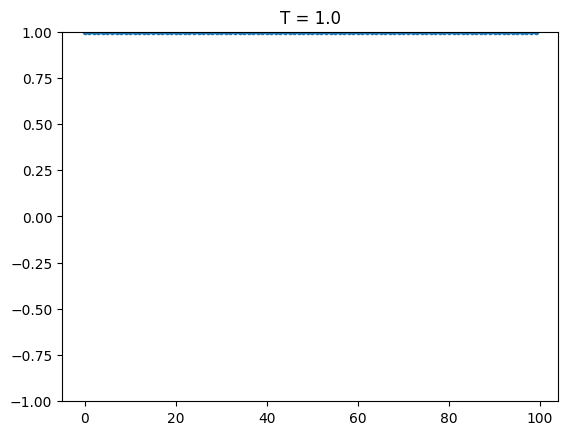

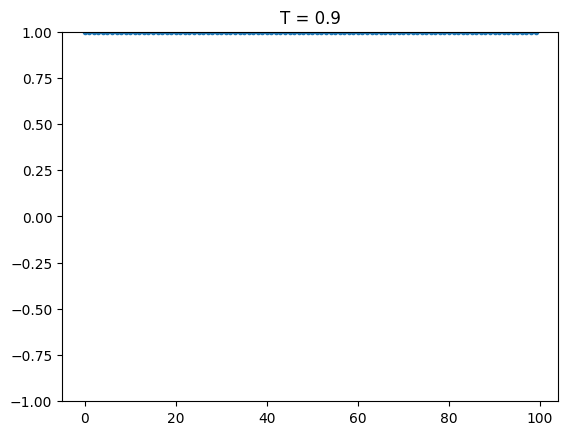

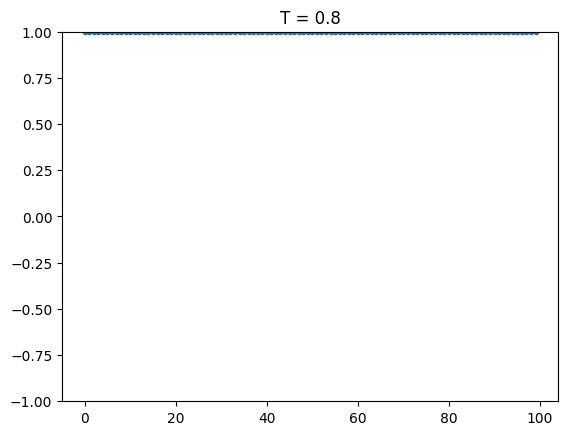

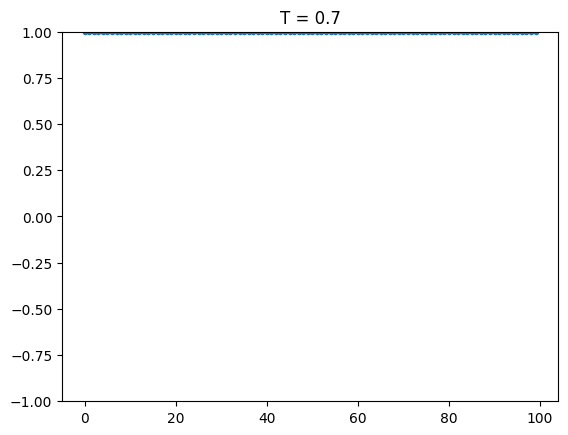

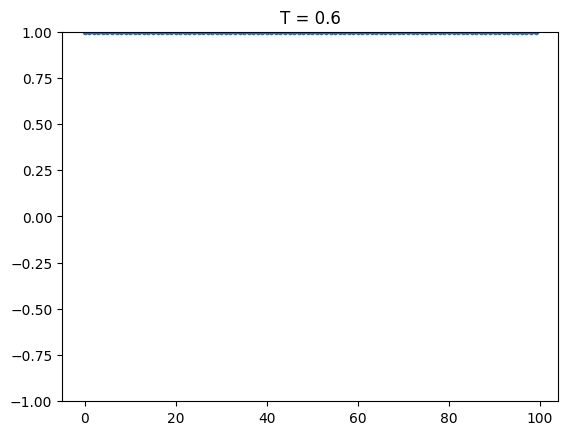

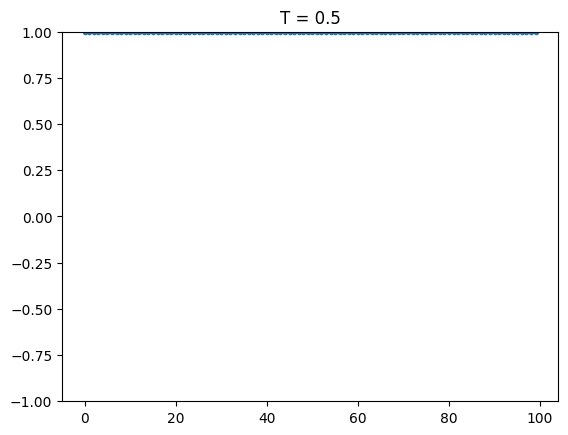

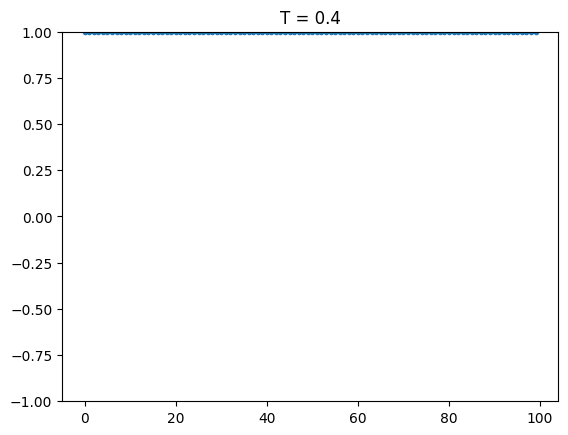

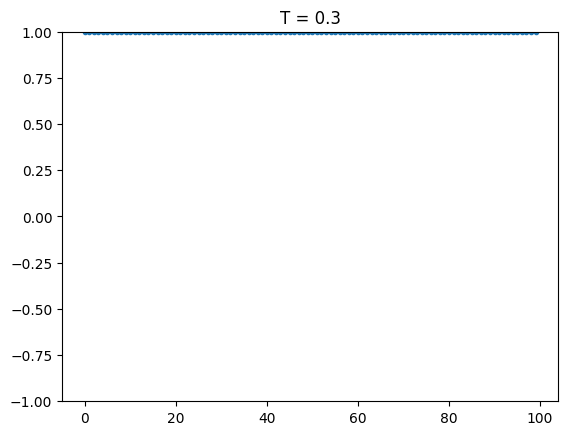

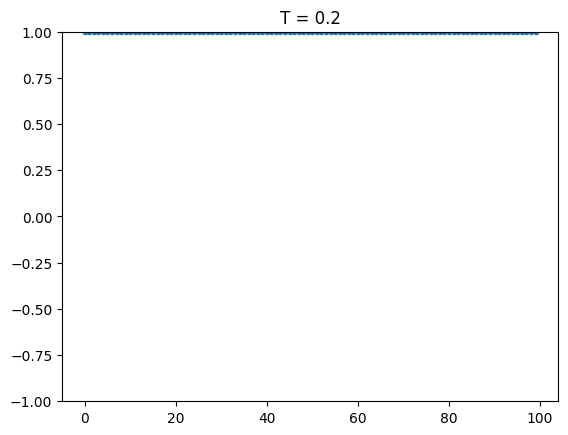

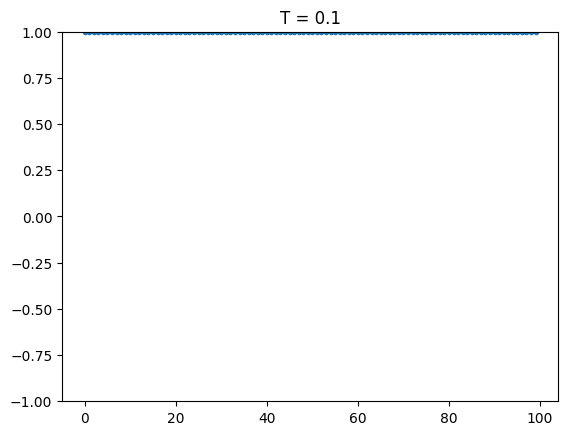

In [69]:
for T in  T_range:
    T = round(T, 2)
    df = pd.read_csv(f'./Resultados/rm0_50_{T}_20_100_10.csv', header= None)
    data = df.to_numpy()[0]
    M = len(data)
    
    fig, ax = plt.subplots()
    ax.set_title(f"T = {T}")
    ax.set_ylim(-1, 1)
    ax.scatter(range(M), data, marker='.')


## Estados finales del sistema

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8588\7614141.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


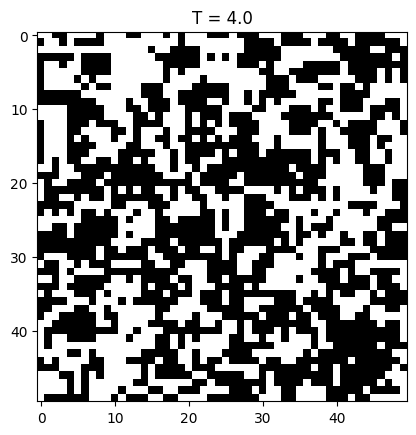

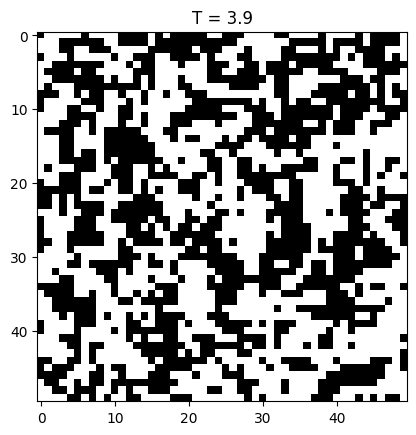

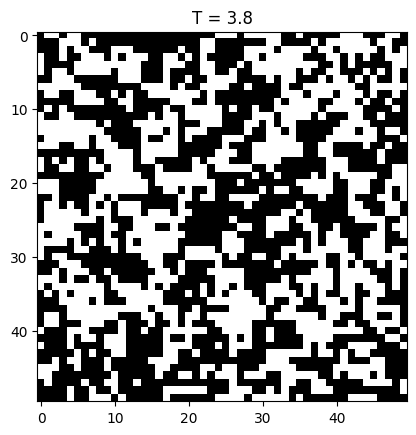

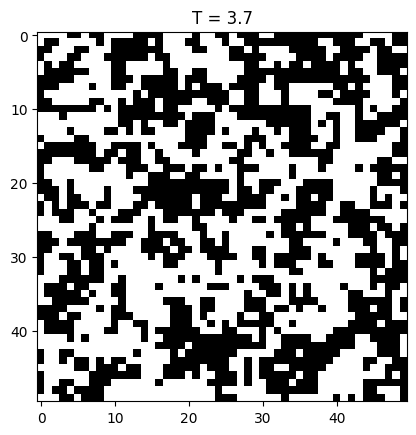

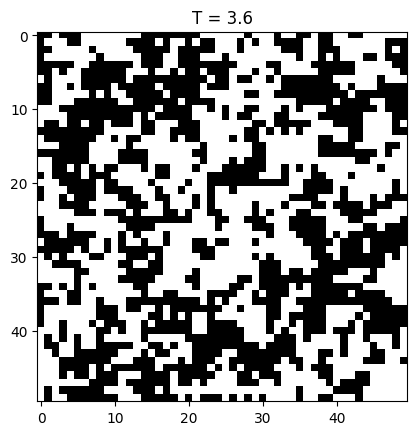

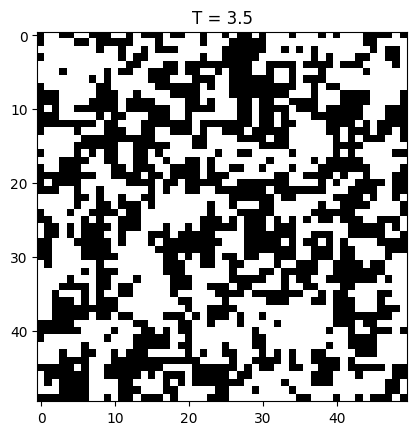

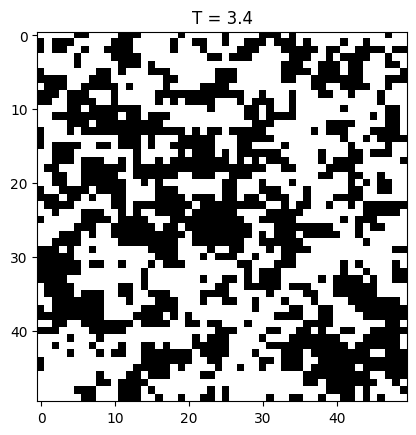

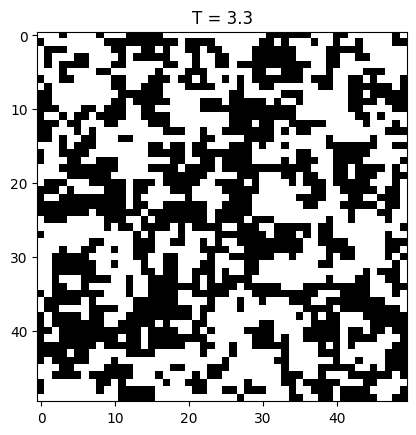

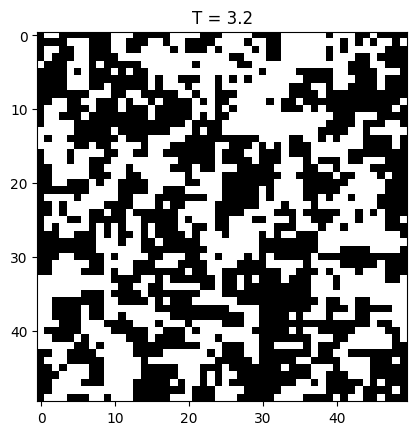

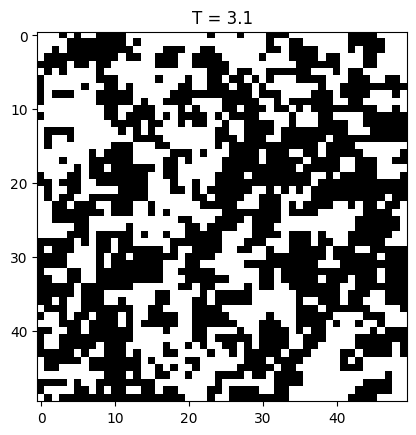

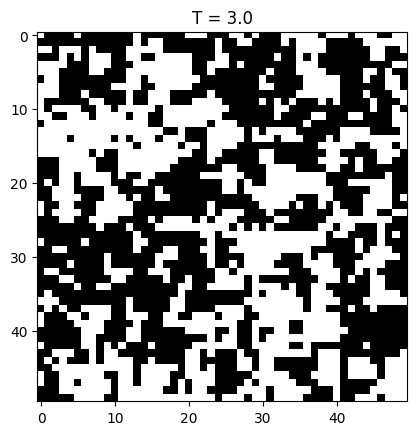

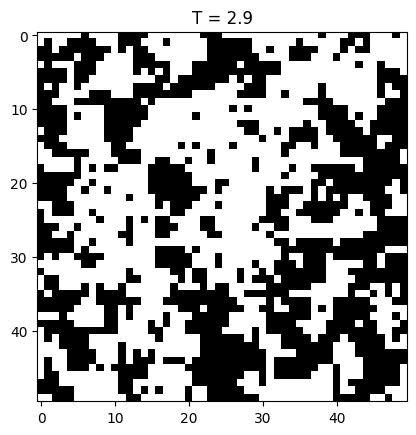

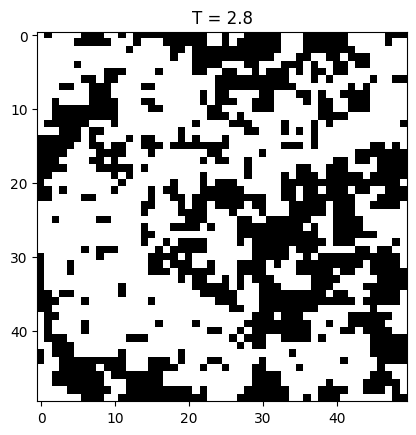

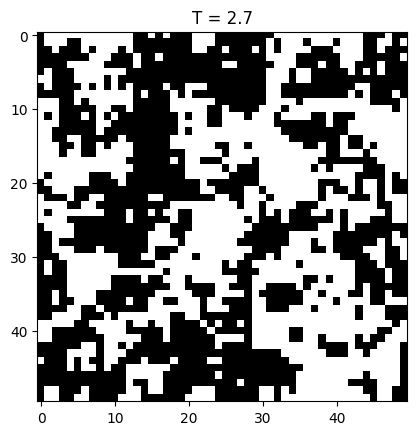

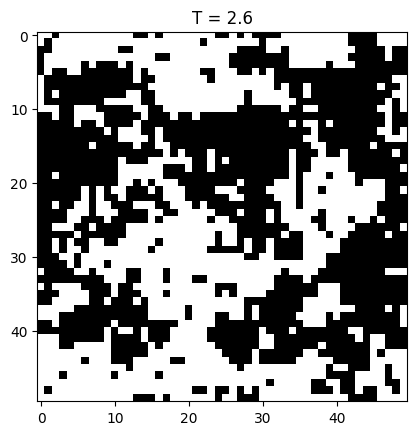

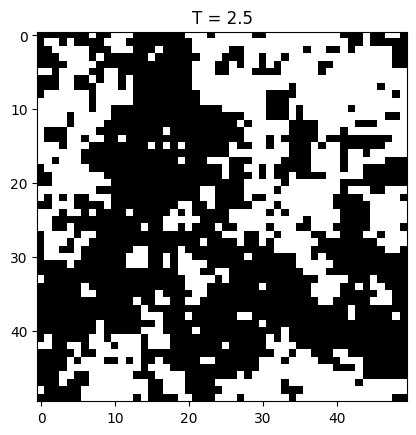

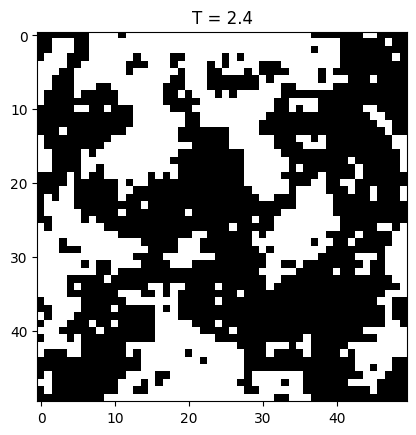

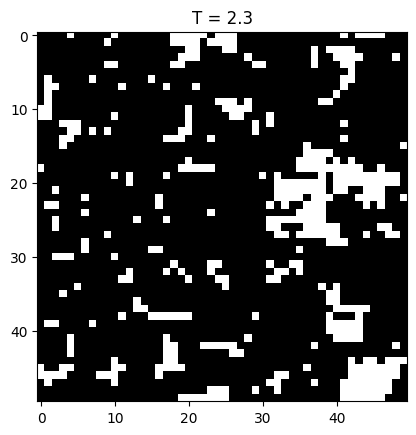

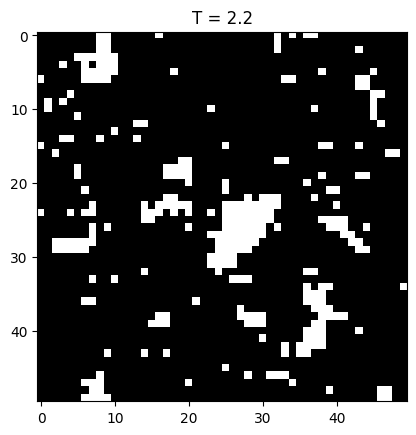

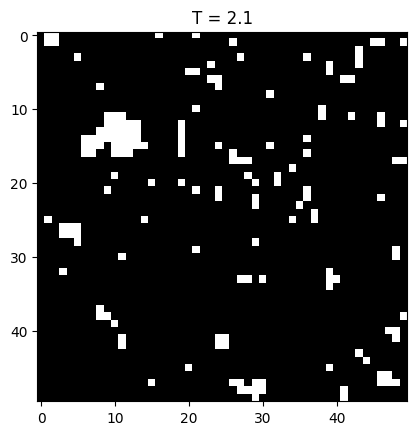

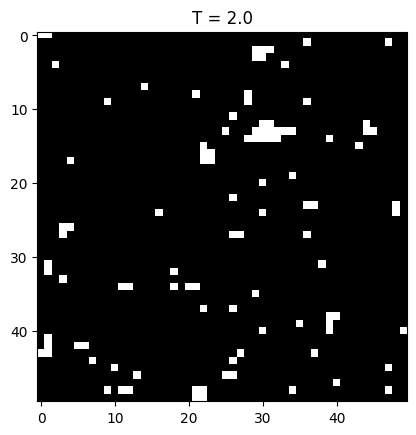

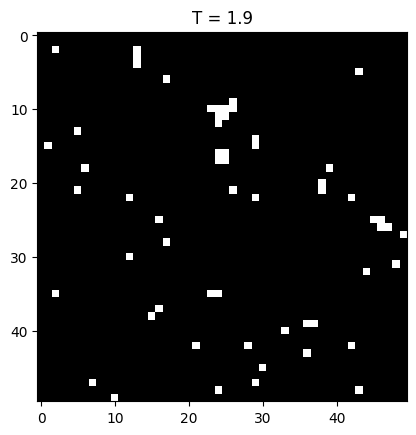

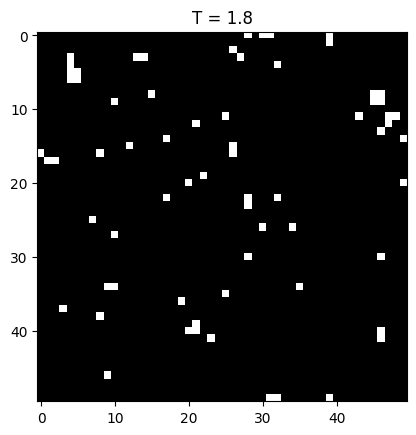

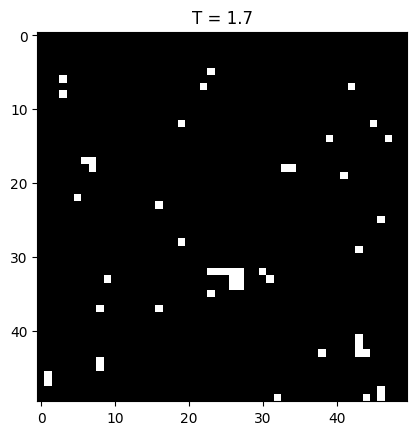

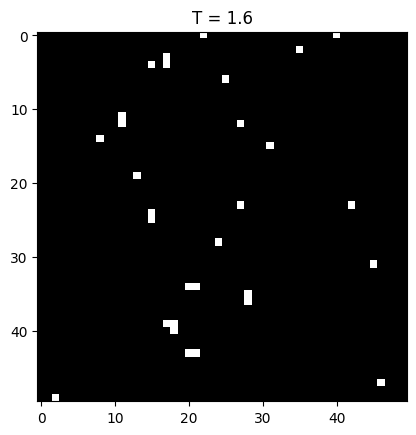

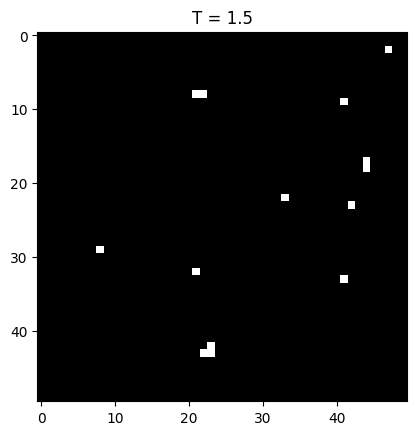

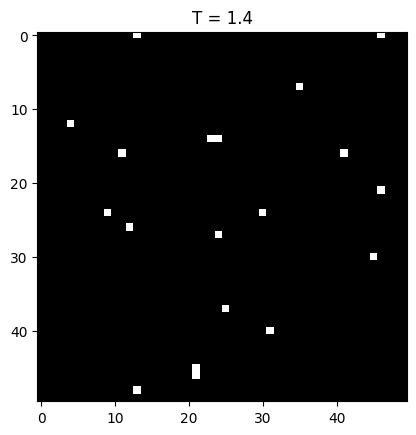

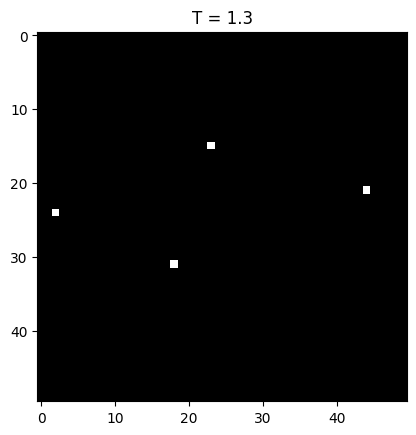

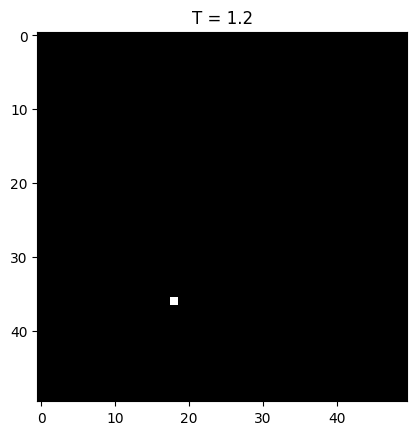

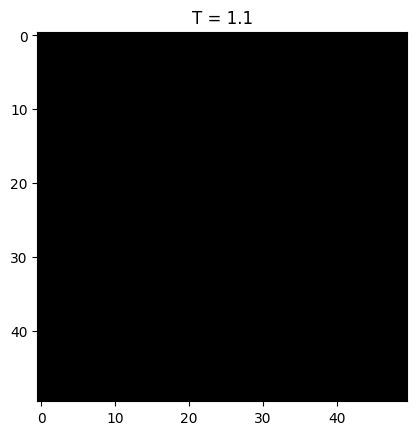

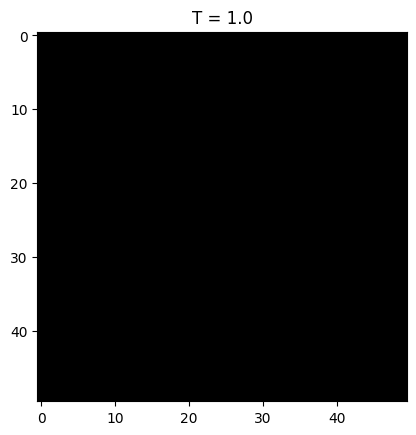

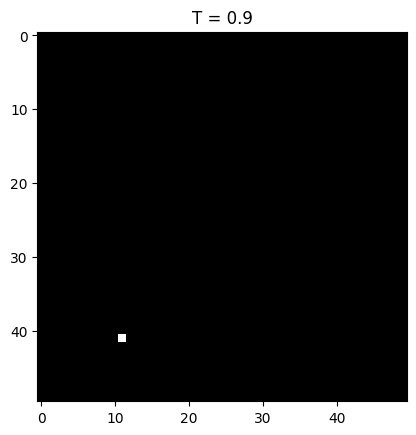

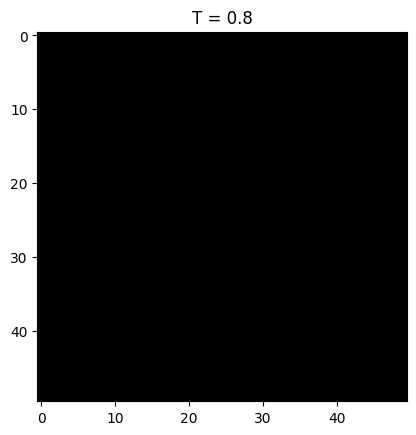

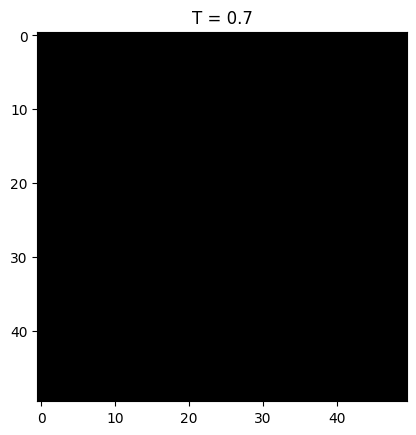

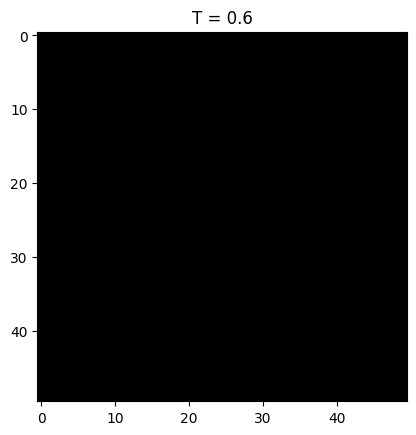

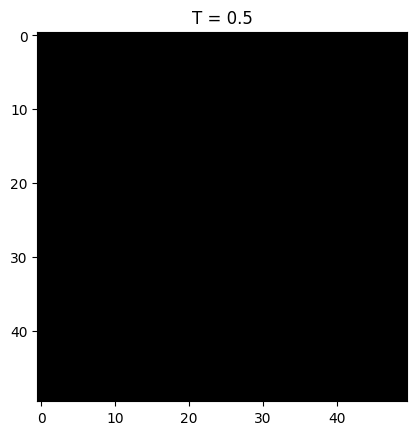

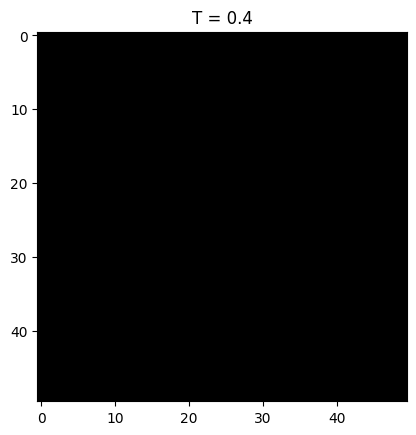

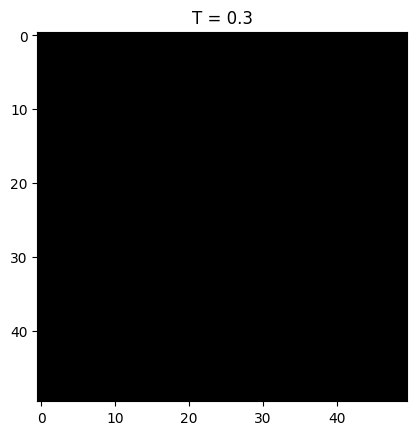

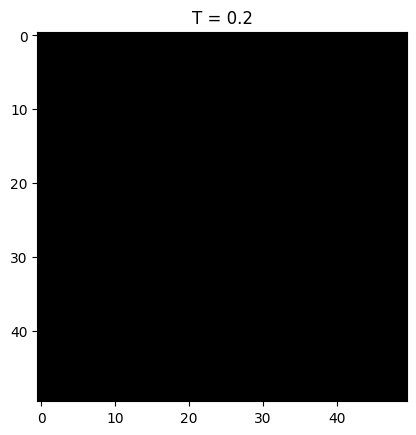

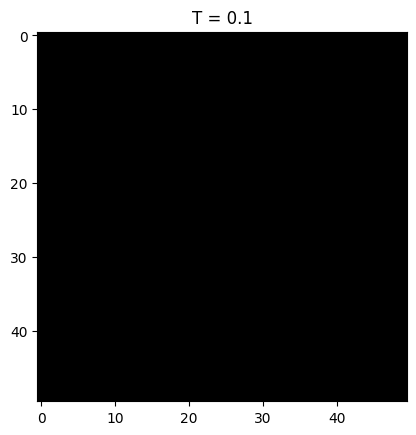

In [70]:
for T in  T_range:
    T = round(T, 2)
    df = pd.read_csv(f'./Resultados/sfinal_50_{T}_20_100_10.csv', header= None)
    data = df.to_numpy()[0]
    N = len(data)
    L = int(np.sqrt(N))
    
    
    fig, ax = plt.subplots()
    ax.set_title(f"T = {T}")
    ax.imshow(np.reshape(data, (L,L)), cmap='binary_r')
    # cmap = 'binary_r': negro = +1, blanco = -1
    

## Medidas generales

In [72]:
df = pd.read_csv(f'./Resultados/medidas.csv')
df.tail(40)


,T,L,M,M0,mc,rm,rm2,error,mc*tau,c,time_of_save
26,4.0,50,100,20,10,0.034160,6.578752e-04,0.002555,-0.039245,-0.003940,2024-03-16 20:47:03.892400
27,3.9,50,100,20,10,0.033768,6.290470e-04,0.001936,-2.020411,-0.253197,2024-03-16 20:47:18.179128
28,3.8,50,100,20,10,0.037672,9.047436e-04,0.003098,0.303658,0.029471,2024-03-16 20:47:32.414840
29,3.7,50,100,20,10,0.037704,9.311060e-04,0.002491,-1.667126,-0.200066,2024-03-16 20:47:46.349359
30,3.6,50,100,20,10,0.034992,7.828303e-04,0.002674,-0.432978,-0.045257,2024-03-16 20:48:03.444175
31,3.5,50,100,20,10,0.040032,7.490166e-04,0.002513,-0.785680,-0.085267,2024-03-16 20:48:19.033459
32,3.4,50,100,20,10,0.041368,9.475238e-04,0.003074,-0.015135,-0.001516,2024-03-16 20:48:35.643475
33,3.3,50,100,20,10,0.036560,7.456320e-04,0.003022,1.125382,0.101154,2024-03-16 20:48:50.824270
34,3.2,50,100,20,10,0.041328,9.974172e-04,0.004036,3.167599,0.240560,2024-03-16 20:49:04.866134
35,3.1,50,100,20,10,0.051608,1.348474e-03,0.004198,1.535542,0.133114,2024-03-16 20:49:18.826874
